In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Step 1: Reading and Understanding the Data

In [2]:
df = pd.read_csv('Car_Price_Prediction.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
df.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [9]:
df.shape

(205, 26)

(205, 26)

Step 2 : Data Cleaning and Preparation

# seperating company name from car name column

In [10]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
df.CompanyName.value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CompanyName, dtype: int64

In [13]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [15]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [17]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

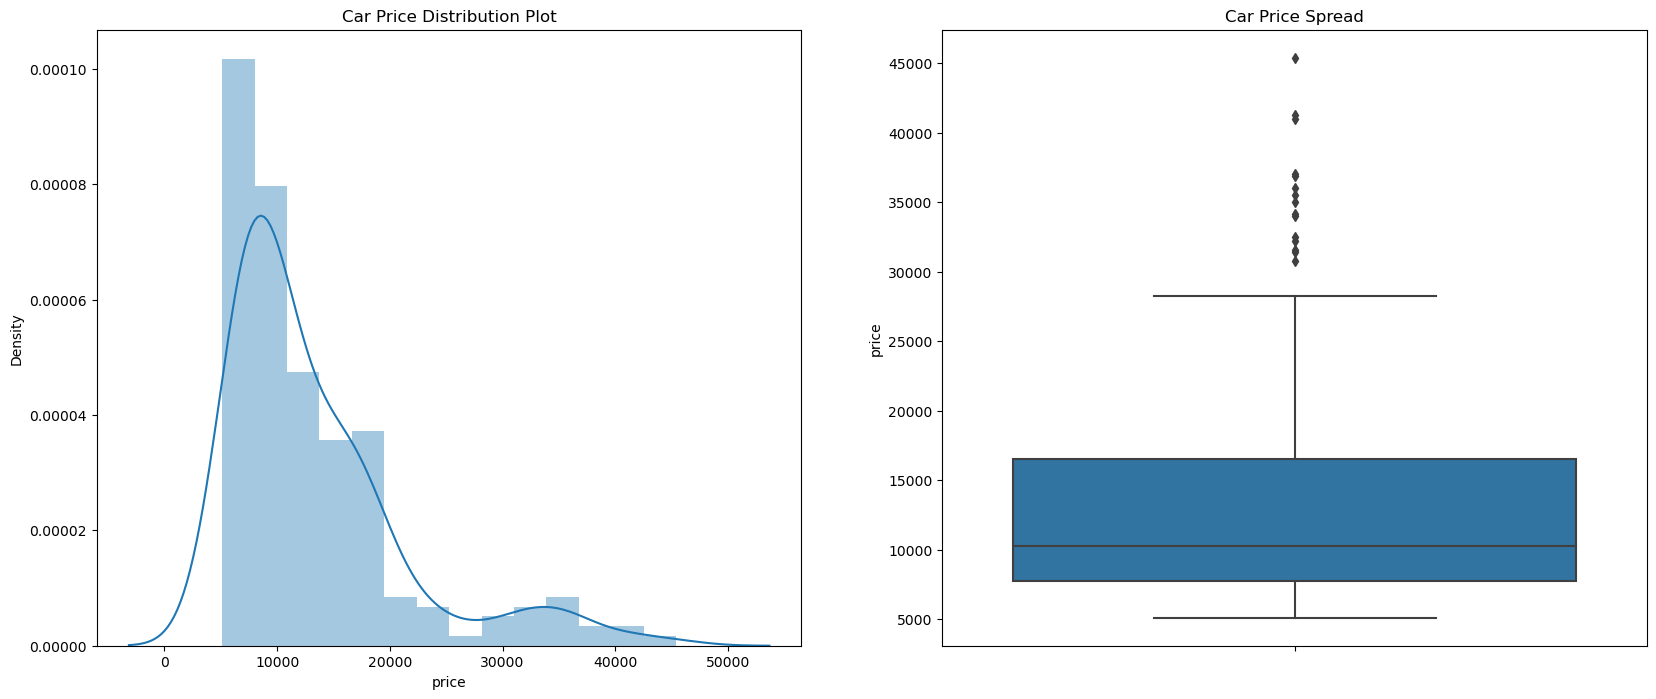

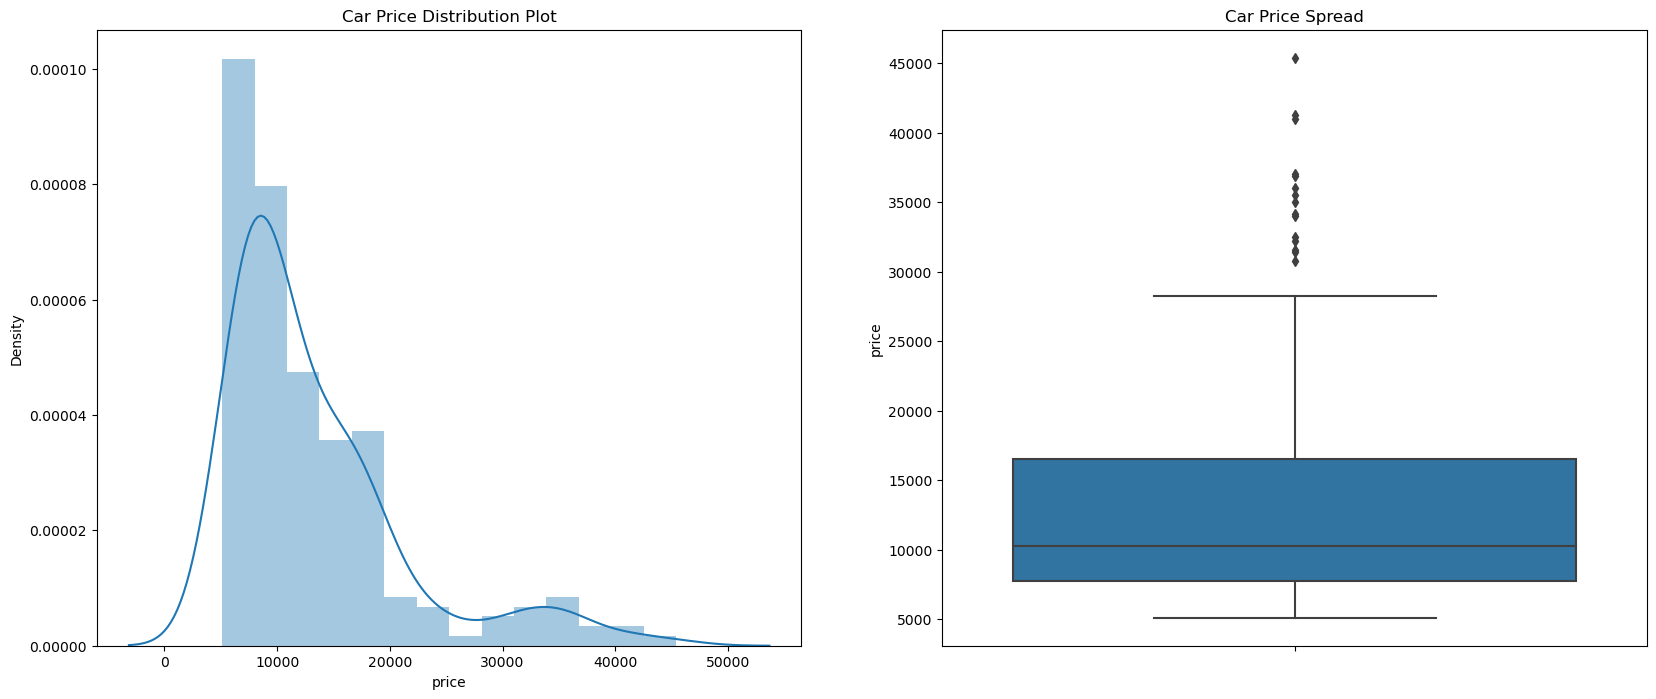

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [19]:
(df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [20]:
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
df.dtypes

car_ID                int64
symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

car_ID                int64
symboling             int64
CompanyName          object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [22]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [71]:
x = df[['wheelbase','carlength', 'carwidth', 'carheight','curbweight','enginesize','boreratio','stroke',
      'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [24]:
y = df[['price']]

In [25]:
x

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [26]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [27]:
# LinearRegression

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(x_train,y_train)

LinearRegression()

LinearRegression()

In [33]:
lr_pred = lr.predict(x_test)

In [34]:
lr_pred

array([[26306.39481293],
       [17869.05337976],
       [10315.49253762],
       [14184.60705675],
       [25249.43237642],
       [ 6021.60477112],
       [ 8494.54215476],
       [ 7280.15399672],
       [11912.05495491],
       [ 8834.26133415],
       [16527.38809285],
       [ 6360.29944744],
       [16728.32596198],
       [ 9224.13556698],
       [40241.32895073],
       [ 5960.02255313],
       [-3554.67545146],
       [15427.70058575],
       [10452.99255046],
       [11628.15814509],
       [10869.36951186],
       [22493.82427958],
       [ 6301.65949576],
       [  -84.93706776],
       [ 6486.16027088],
       [26588.26356153],
       [13432.51631821],
       [17060.7984111 ],
       [ 5697.08372496],
       [16814.36906232],
       [24807.99873453],
       [ 6467.35106126],
       [ 6692.05074053],
       [24762.329656  ],
       [ 8608.90171314],
       [24598.08724223],
       [11346.97491596],
       [ 9791.27734775],
       [ 4743.84135756],
       [15501.11653283],


array([[26306.39481293],
       [17869.05337976],
       [10315.49253762],
       [14184.60705675],
       [25249.43237642],
       [ 6021.60477112],
       [ 8494.54215476],
       [ 7280.15399672],
       [11912.05495491],
       [ 8834.26133415],
       [16527.38809285],
       [ 6360.29944744],
       [16728.32596198],
       [ 9224.13556698],
       [40241.32895073],
       [ 5960.02255313],
       [-3554.67545146],
       [15427.70058575],
       [10452.99255046],
       [11628.15814509],
       [10869.36951186],
       [22493.82427958],
       [ 6301.65949576],
       [  -84.93706776],
       [ 6486.16027088],
       [26588.26356153],
       [13432.51631821],
       [17060.7984111 ],
       [ 5697.08372496],
       [16814.36906232],
       [24807.99873453],
       [ 6467.35106126],
       [ 6692.05074053],
       [24762.329656  ],
       [ 8608.90171314],
       [24598.08724223],
       [11346.97491596],
       [ 9791.27734775],
       [ 4743.84135756],
       [15501.11653283],


In [35]:
from sklearn.metrics import r2_score

In [36]:
lr1 = r2_score(lr_pred,y_test).round(2)

In [37]:
lr1

0.77

0.77

In [38]:
# DecisionTree

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
dr = DecisionTreeRegressor()

In [41]:
dr.fit(x_train,y_train)

DecisionTreeRegressor()

DecisionTreeRegressor()

In [42]:
dr_pred = dr.predict(x_test)

In [43]:
dr_pred

array([36000. , 23875. ,  8949. , 12170. , 31600. ,  7395. ,  7126. ,
        8358. ,  8949. ,  7995. , 24565. ,  8058. , 12764. , 11248. ,
       45400. ,  6669. ,  5399. , 12764. ,  6989. ,  8949. , 10245. ,
       14869. ,  7395. ,  5399. ,  7609. , 36000. ,  9989. , 16515. ,
        7395. , 15985. , 31600. ,  7609. ,  7995. , 18920. ,  7957. ,
       31600. ,  8949. , 13645. ,  6575. , 14869. ,  8499. ,  8921. ,
       16695. ,  7995. ,  7299. ,  8495. ,  7609. ,  7603. , 17950. ,
       12764. ,  8916.5, 15998. ,  5348. , 10898. ,  7395. , 17450. ,
        9989. , 13645. , 33278. ,  5572. , 12945. , 19699. ])

array([36000. , 23875. ,  8949. , 12170. , 31600. ,  7395. ,  7126. ,
        8358. ,  8949. ,  7995. , 24565. ,  8058. , 12764. , 11248. ,
       45400. ,  6669. ,  5399. , 12764. ,  6989. ,  8949. , 10245. ,
       14869. ,  7395. ,  5399. ,  7609. , 36000. ,  9989. , 16515. ,
        7395. , 15985. , 31600. ,  7609. ,  7995. , 18920. ,  7957. ,
       31600. ,  8949. , 13645. ,  6575. , 14869. ,  8499. ,  8921. ,
       16695. ,  7995. ,  7299. ,  8495. ,  7609. ,  7603. , 17950. ,
       12764. ,  8916.5, 15998. ,  5348. , 10898. ,  7395. , 17450. ,
        9989. , 13645. , 33278. ,  5572. , 12945. , 19699. ])

In [44]:
DS = r2_score(dr_pred,y_test).round(2)

In [45]:
DS

0.89

0.89

In [46]:
# RandomForest

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(x_train,y_train)

RandomForestRegressor()

RandomForestRegressor()

In [50]:
rf_pred = rf.predict(x_test)

In [51]:
rf_pred

array([35756.285     , 18522.89      ,  9182.62333333, 13111.39666667,
       27664.725     ,  7074.11      ,  8185.965     ,  8000.58      ,
       10176.005     ,  8291.665     , 15269.54791667,  8005.63      ,
       14858.3975    , 10938.19833333, 41689.35      ,  6328.345     ,
        6062.7       , 14198.34      ,  8261.835     ,  9691.735     ,
       10380.59      , 15346.435     ,  7074.34      ,  6448.01      ,
        7283.45      , 35650.04      , 10770.245     , 16883.43      ,
        7027.61      , 16506.25      , 27765.025     ,  7238.36      ,
        8441.975     , 19554.825     ,  8058.05      , 27663.375     ,
       10900.53916667, 13511.17      ,  7213.29      , 14948.22      ,
        8824.115     , 10580.53833333, 15791.61333333,  8053.545     ,
        7120.86      ,  8722.62      ,  7238.36      ,  7607.5       ,
       16011.17      , 13892.19      ,  8006.5       , 16458.71      ,
        6906.265     , 10338.09833333,  7027.61      , 14369.96363095,
      

array([35756.285     , 18522.89      ,  9182.62333333, 13111.39666667,
       27664.725     ,  7074.11      ,  8185.965     ,  8000.58      ,
       10176.005     ,  8291.665     , 15269.54791667,  8005.63      ,
       14858.3975    , 10938.19833333, 41689.35      ,  6328.345     ,
        6062.7       , 14198.34      ,  8261.835     ,  9691.735     ,
       10380.59      , 15346.435     ,  7074.34      ,  6448.01      ,
        7283.45      , 35650.04      , 10770.245     , 16883.43      ,
        7027.61      , 16506.25      , 27765.025     ,  7238.36      ,
        8441.975     , 19554.825     ,  8058.05      , 27663.375     ,
       10900.53916667, 13511.17      ,  7213.29      , 14948.22      ,
        8824.115     , 10580.53833333, 15791.61333333,  8053.545     ,
        7120.86      ,  8722.62      ,  7238.36      ,  7607.5       ,
       16011.17      , 13892.19      ,  8006.5       , 16458.71      ,
        6906.265     , 10338.09833333,  7027.61      , 14369.96363095,
      

In [52]:
RR = r2_score(rf_pred,y_test).round(2)

In [53]:
RR

0.94

0.94

In [54]:
# SVR

In [55]:
from sklearn.svm  import SVR

In [56]:
sv = SVR()

In [57]:
sv.fit(x_train,y_train)

SVR()

SVR()

In [58]:
sv_pred = sv.predict(x_test)

In [59]:
sv_pred

array([10797.59312305, 10796.82645518, 10794.09011151, 10795.44809664,
       10800.04366615, 10793.03261369, 10794.45238031, 10793.72790239,
       10794.68018304, 10794.18514799, 10795.29737821, 10793.97190127,
       10795.66830492, 10795.20205824, 10800.51279689, 10793.25219385,
       10791.14652947, 10796.31417871, 10794.62093706, 10794.23344907,
       10794.77570241, 10797.20261857, 10792.95744287, 10792.1440614 ,
       10792.70020033, 10798.1529111 , 10795.27908897, 10796.81382537,
       10793.06677322, 10796.34289543, 10799.24086663, 10792.61881721,
       10794.29874098, 10796.67343527, 10793.29520447, 10799.17027814,
       10795.16739104, 10793.89381177, 10792.46374565, 10796.6754113 ,
       10794.30774963, 10796.28445107, 10797.23015607, 10794.25988585,
       10792.81958403, 10793.66540873, 10792.61881721, 10793.94246841,
       10798.37765501, 10796.22850061, 10792.33562484, 10796.74471931,
       10793.25992846, 10794.86955962, 10793.01798498, 10794.69832309,
      

array([10797.59312305, 10796.82645518, 10794.09011151, 10795.44809664,
       10800.04366615, 10793.03261369, 10794.45238031, 10793.72790239,
       10794.68018304, 10794.18514799, 10795.29737821, 10793.97190127,
       10795.66830492, 10795.20205824, 10800.51279689, 10793.25219385,
       10791.14652947, 10796.31417871, 10794.62093706, 10794.23344907,
       10794.77570241, 10797.20261857, 10792.95744287, 10792.1440614 ,
       10792.70020033, 10798.1529111 , 10795.27908897, 10796.81382537,
       10793.06677322, 10796.34289543, 10799.24086663, 10792.61881721,
       10794.29874098, 10796.67343527, 10793.29520447, 10799.17027814,
       10795.16739104, 10793.89381177, 10792.46374565, 10796.6754113 ,
       10794.30774963, 10796.28445107, 10797.23015607, 10794.25988585,
       10792.81958403, 10793.66540873, 10792.61881721, 10793.94246841,
       10798.37765501, 10796.22850061, 10792.33562484, 10796.74471931,
       10793.25992846, 10794.86955962, 10793.01798498, 10794.69832309,
      

In [60]:
SR = r2_score(sv_pred,y_test).round(2)

In [61]:
SR

-17750953.59

-17750953.59

In [62]:
results = pd.DataFrame({'Algorithm':['Linear Regression','Decision Tree','Random Forest','SVR'],'Accuracy':[lr1,DS,RR,SR]})

In [63]:
results

,Algorithm,Accuracy
0,Linear Regression,0.77
1,Decision Tree,0.89
2,Random Forest,0.94
3,SVR,-17750953.59


,Algorithm,Accuracy
0,Linear Regression,0.77
1,Decision Tree,0.89
2,Random Forest,0.94
3,SVR,-17750953.59


In [82]:
# Normalization

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scaler = MinMaxScaler()

In [77]:
scalerled = scaler.fit_transform(x)

In [78]:
scalerled

array([[0.05830904, 0.41343284, 0.31666667, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.05830904, 0.41343284, 0.31666667, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.2303207 , 0.44925373, 0.43333333, ..., 0.34693878, 0.16666667,
        0.26315789],
       ...,
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.55102041, 0.13888889,
        0.18421053],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.26530612, 0.36111111,
        0.28947368],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.51020408, 0.16666667,
        0.23684211]])

array([[0.05830904, 0.41343284, 0.31666667, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.05830904, 0.41343284, 0.31666667, ..., 0.34693878, 0.22222222,
        0.28947368],
       [0.2303207 , 0.44925373, 0.43333333, ..., 0.34693878, 0.16666667,
        0.26315789],
       ...,
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.55102041, 0.13888889,
        0.18421053],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.26530612, 0.36111111,
        0.28947368],
       [0.65597668, 0.7119403 , 0.71666667, ..., 0.51020408, 0.16666667,
        0.23684211]])

In [83]:
# Standardization

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
data_scaler = StandardScaler()

In [86]:
scaler = data_scaler.fit_transform(x)

In [87]:
scaler

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.57769233,
        -0.95301169, -0.83719538]])

array([[-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-1.6907718 , -0.42652147, -0.84478235, ..., -0.26296022,
        -0.64655303, -0.54605874],
       [-0.70859588, -0.23151305, -0.19056612, ..., -0.26296022,
        -0.95301169, -0.69162706],
       ...,
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.78785546,
        -1.10624102, -1.12833203],
       [ 1.72187336,  1.19854871,  1.39824472, ..., -0.68328649,
         0.11959362, -0.54605874],
       [ 1.72187336,  1.19854871,  1.39824472, ...,  0.57769233,
        -0.95301169, -0.83719538]])

In [ ]:
SS